**Game of Tic-Tac-Toe**
>Q-Learning
>>Haritha.R
>>>AI20BTECH11010

agent symbol = 'X' = 1

opponent symbol = 'O' = -1

Empty = 0

In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# tic-tac-toe board is of shape 3*3
shape_board = 3

#total number of games required for training each opponent
num_training = 10000

# total number of games used for final testing
num_testing= 1000

# number of games after which we test the efficacy of the trained agent
num_test_after_train = 200

# number of games played with the opponent using the full greedy policy with respect to the current Q-table to test the trained agent
num_test_greedy = 100

In [3]:
# Tic-Tac-Toe Game
class Tic_Tac_Toe(object):

    # all parameters are created and initialised using this constructor function
    def __init__(self, num):
        self.n = num
        self.board = np.zeros((num, num))
        self.is_end_reached = False

    # initialises the board to the start to all empty positions
    def init(self):
        self.board = np.zeros((self.n, self.n))
        self.is_end_reached = False

    # act function : takes the move
    #checks if the move is valid and places the symbol in the appropriate board position.
    def act(self, move , symbol):

        positions_empty=self.positions_available()
        # checks if move is free position
        if(move in positions_empty):
          self.board[move] = symbol

    # returns empty board positions of the board
    def positions_available(self):
        positions_empty = []
        for i in range(self.n):
            for j in range(self.n):
                if self.board[i, j] == 0:
                    positions_empty.append((i, j))
        return positions_empty

    # check if there is a winner in the board
    def any_winner(self):
        # check if any of rows are all equal
        for i in range(self.n):
            row_sum = sum(self.board[i, :])
            if row_sum == self.n:
                self.is_end_reached = True
                return 1  #agent is the winner
            if row_sum == -self.n:
                self.is_end_reached = True
                return -1  #opponent is the winner

        # check if any of columns are all equal
        for i in range(self.n):
            col_sum = sum(self.board[:, i])
            if col_sum == self.n:
                self.is_end_reached = True
                return 1 #agent is the winner
            if col_sum == -self.n:
                self.is_end_reached = True
                return -1  #opponent is the winner

        # check if any of diagonal are all equal
        diagonal_sum1 = sum([self.board[i, i] for i in range(self.n)])
        diagonal_sum2 = sum([self.board[i, self.n - i -1] for i in range(self.n)])
        if diagonal_sum1 == self.n or diagonal_sum2 == self.n:
            self.is_end_reached = True
            return 1 #agent is the winner
        if diagonal_sum1 == -self.n or diagonal_sum2 == -self.n:
            self.is_end_reached = True
            return -1 #opponent is the winner

        # if there are no positions left
        if len(self.positions_available()) == 0:
            self.is_end_reached = True
            return 0 #draw:board filled and no winner

        # if there are empty spaces left to play then continue the game
        self.is_end_reached = False
        return None

    # return reward for the present state
    def reward(self):
        result = self.any_winner()
        if result == 1:
            return 10  # reward label if agent wins
        if result == -1:
            return -10 # reward label if agent looses
        if result == 0:
            return 1   # reward label if game draw
        return 0  # reward if game continuing

    # return current state of board as a string
    def current_state(self):
        return str(self.board.reshape(self.n*self.n))

    #prints the tic tac toe game board
    def print_board(self):
       print(self.board)


In [4]:

# Random Agent
class Random_Agent(object):

    # random agent picks a square among all available empty squares in a uniform random fashion
    def policy(self, game_tic_tac_toe_board):
        # finds available actions
        actions = game_tic_tac_toe_board.positions_available()

        # returns a random action among the available actions
        return random.choice(actions)


In [5]:

# Safe Agent
class Safe_Agent(object):

    def policy(self, game_tic_tac_toe_board):
        # finds available actions
        actions = game_tic_tac_toe_board.positions_available()

        # checking possibility of win in any row
        for i in range(game_tic_tac_toe_board.n):
            sum_row = sum(game_tic_tac_toe_board.board[i, :])
            if sum_row == 1 - game_tic_tac_toe_board.n:
                return (i, list(game_tic_tac_toe_board.board[i, :]).index(0))

        # checking possibility of win in any column
        for i in range(game_tic_tac_toe_board.n):
            sum_column = sum(game_tic_tac_toe_board.board[:, i])
            if sum_column == 1 - game_tic_tac_toe_board.n:
                return (list(game_tic_tac_toe_board.board[:, i]).index(0), i)

        # checking possiblity of win in any of the diagonals
        diagonal_1 = [game_tic_tac_toe_board.board[i, i] for i in range(game_tic_tac_toe_board.n)]
        diagonal_2 = [game_tic_tac_toe_board.board[i, game_tic_tac_toe_board.n - i -1] for i in range(game_tic_tac_toe_board.n)]

        if sum(diagonal_1) == 1 - game_tic_tac_toe_board.n:
            return (diagonal_1.index(0), diagonal_1.index(0))

        if sum(diagonal_2) == 1 - game_tic_tac_toe_board.n:
            return (diagonal_2.index(0), game_tic_tac_toe_board.n - 1 - diagonal_2.index(0))

        # checking possibility of block in any row
        for i in range(game_tic_tac_toe_board.n):
            sum_row = sum(game_tic_tac_toe_board.board[i, :])
            if sum_row == game_tic_tac_toe_board.n - 1:
                return (i, list(game_tic_tac_toe_board.board[i, :]).index(0))

        # checking possibility of block in any column
        for i in range(game_tic_tac_toe_board.n):
            sum_column = sum(game_tic_tac_toe_board.board[:, i])
            if sum_column == game_tic_tac_toe_board.n - 1:
                return (list(game_tic_tac_toe_board.board[:, i]).index(0), i)

        # checking possiblity of block in any of the diagonals
        diagonal_1 = [game_tic_tac_toe_board.board[i, i] for i in range(game_tic_tac_toe_board.n)]
        diagonal_2 = [game_tic_tac_toe_board.board[i, game_tic_tac_toe_board.n - i -1] for i in range(game_tic_tac_toe_board.n)]

        if sum(diagonal_1) == game_tic_tac_toe_board.n - 1:
            return (diagonal_1.index(0), diagonal_1.index(0))

        if sum(diagonal_2) == game_tic_tac_toe_board.n - 1:
            return (diagonal_2.index(0), game_tic_tac_toe_board.n - 1 - diagonal_2.index(0))

        # if there is no winning or blocking moves availabe , then the agent acts randomly
        return random.choice(actions)



In [6]:

class Agent_Qlearn(object):

    # all parameters are created and initialised using this constructor function
    def __init__(self):
        self.gamma = 0.9
        self.epsilon = 0.05
        self.alpha = 0.05
        self.Q_table = {}

    # Choosing action that can be executed at a state
    def action_selected(self, game_tic_tac_toe_board):
        # find actions that can be performed
        actions = game_tic_tac_toe_board.positions_available()

        # choose the type of exploration
        p = random.random()

        # random round
        if p < self.epsilon:
            return random.choice(actions)
        else:
            return self.policy_action_select(game_tic_tac_toe_board, actions)

    # choosing best action with highest Q(s,a) value
    def policy_action_select(self, game_tic_tac_toe_board, actions):
        # current state of game_tic_tac_toe_board
        s = game_tic_tac_toe_board.current_state()

        # select the best action for the state
        max_value = max([self.Q_s_a(s, a) for a in actions])
        max_actions = [a for a in actions if self.Q_s_a(s,a) == max_value]
        return random.choice(max_actions)

    # Q(s, a) from Q table
    def Q_s_a(self, s, a):
        if (s, a) in self.Q_table:
            return self.Q_table[(s, a)]
        self.Q_table[(s, a)] = 0
        return self.Q_table[(s, a)]

    #observing each and every state of the Board after actions
    def observe(self, game_tic_tac_toe_board, state_before_agent, action_performed, state_after_agent):
        # find available actions
        actions = game_tic_tac_toe_board.positions_available()

        # reward of present state
        reward = game_tic_tac_toe_board.reward()

        # update Q table
        if len(actions) == 0:
            max_value = 0
        else:
            max_value = max([self.Q_s_a(state_after_agent, a) for a in actions])
        self.Q_table[(state_before_agent, action_performed)] = self.Q_s_a(state_before_agent, action_performed) + self.alpha*(reward + self.gamma*max_value - self.Q_s_a(state_before_agent, action_performed))



In [7]:
# function for playing opponent turn
def playing_opponent_turn(game_tic_tac_toe_board, opponent):
    # choose the appropriate action using the policy of the opponent
    opponent_action = opponent.policy(game_tic_tac_toe_board)

    game_tic_tac_toe_board.act(opponent_action, -1)   #opponent symbol = 'O' = -1

    return game_tic_tac_toe_board, opponent_action

In [8]:
# function for playing agent turn
def playing_agent_turn(game_tic_tac_toe_board, agent):
    # choose the best move by the agent
    agent_action = agent.action_selected(game_tic_tac_toe_board)

    game_tic_tac_toe_board.act(agent_action, 1)  #agent symbol = 'X' = 1

    return game_tic_tac_toe_board, agent_action

In [9]:
# function to test the agent against different opponents
def testing(game_tic_tac_toe_board, agent_policy ,opponent_policy,  num_rounds = num_test_greedy, debug = False):
    rewards_obtained = []

    #testing the trained agent num_rounds times
    for game_no in range(num_rounds):
        # Initialise the game_tic_tac_toe_board to start for this game
        game_tic_tac_toe_board.init()

        # first move is choosen using fair toss
        turn = random.choice([-1, 1])

        # if the first turn is opponent's
        if turn == -1:
            game_tic_tac_toe_board, opponent_action_performed = playing_opponent_turn(game_tic_tac_toe_board, opponent_policy)

        # Recursively play agent turn and opponent turn until game ends
        while not game_tic_tac_toe_board.is_end_reached:
            # Play agent turn
            game_tic_tac_toe_board, agent_action_performed = playing_agent_turn(game_tic_tac_toe_board, agent_policy)

            # check winner
            winner = game_tic_tac_toe_board.any_winner()

            # if winner is not yet decided
            if winner is None:
                # play the opponent turn
                game_tic_tac_toe_board, opponent_action_performed = playing_opponent_turn(game_tic_tac_toe_board, opponent_policy)

            # collect reward after each turn
            reward = game_tic_tac_toe_board.reward()
        # store reward after each game
        rewards_obtained.append(reward)


    if(debug == True):
        print("number of wins: ",rewards_obtained.count(10))
        print("number of loss: ",rewards_obtained.count(-10))
        print("number of ties:", rewards_obtained.count(1))

    # number of wins
    return rewards_obtained.count(10)



In [10]:
# function to train the agent against different opponents
def train(game_tic_tac_toe_board, agent_policy ,opponents_list):
    train_wins = []

    for game_no in range(num_training):
        # Initialise the game_tic_tac_toe_board to start for this game
        game_tic_tac_toe_board.init()

        # Choose one of the opponent for this game
        opponent_policy = random.choice(opponents_list)

        # first move is choosen using fair toss
        turn = random.choice([-1, 1])

        # if first turn is opponent's turn
        if turn == -1:
            game_tic_tac_toe_board, opponent_action_performed = playing_opponent_turn(game_tic_tac_toe_board, opponent_policy)

        # Recursively play agent turn and opponent turn until game ends
        while not game_tic_tac_toe_board.is_end_reached:

            state_before_agent = game_tic_tac_toe_board.current_state()
            game_tic_tac_toe_board, agent_action_performed = playing_agent_turn(game_tic_tac_toe_board, agent_policy)
            state_after_agent = game_tic_tac_toe_board.current_state()
            # check winner
            winner = game_tic_tac_toe_board.any_winner()
            # if winner is not yet decided
            if winner is None:
                # play opponent turn
                game_tic_tac_toe_board, opponent_action_performed = playing_opponent_turn(game_tic_tac_toe_board, opponent_policy)
                # state before agent turn
                state_after_agent = game_tic_tac_toe_board.current_state()

            # Observe the game_tic_tac_toe_board after this move
            agent_policy.observe(game_tic_tac_toe_board, state_before_agent, agent_action_performed, state_after_agent)

        # After every 200 games assess the efficacy of the training
        if game_no % num_test_after_train == 0:
            num_wins = testing(game_tic_tac_toe_board, agent_policy, opponent_policy)
            train_wins.append(num_wins)

    # return the trained agent
    return agent_policy, train_wins



In [11]:
def plotting(random_agent_train, safe_agent_train, both_agent_train):
    plt.title(" Training progress graph")
    plt.xlabel("Epoch")
    plt.ylabel("Wins count")
    epochs = np.arange(0,num_training , num_test_after_train)
    plt.plot(epochs, random_agent_train, label = "random")
    plt.plot(epochs, safe_agent_train, label = "safe")
    plt.plot(epochs, both_agent_train, label = "both")
    plt.legend()
    plt.show()

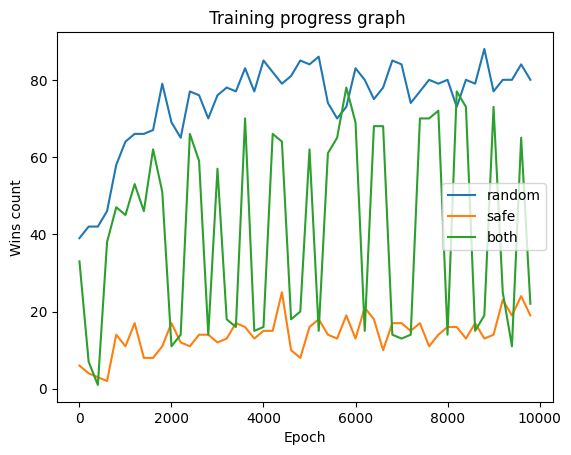

In [12]:
# create the board
game_tic_tac_toe_board = Tic_Tac_Toe(shape_board)

#Training
#Training against Random Opponents
random_opponent = Random_Agent()
random_agent = Agent_Qlearn()
random_agent, random_agent_train_wins = train(game_tic_tac_toe_board, random_agent, [random_opponent])


#Training against Safe Opponents
safe_opponent = Safe_Agent()
safe_agent = Agent_Qlearn()
safe_agent, safe_agent_train_wins = train(game_tic_tac_toe_board, safe_agent, [safe_opponent])


#Training against Safe and random Opponents
both_agent = Agent_Qlearn()
both_agent, both_agent_train_wins = train(game_tic_tac_toe_board, both_agent,[random_opponent, safe_opponent])

plotting(random_agent_train_wins, safe_agent_train_wins, both_agent_train_wins)



In [13]:
# Testing
# Randomly Trained agent vs Random player
print("Test Against Randomly Trained agent vs Random opponent ")
testing(game_tic_tac_toe_board, random_agent, random_opponent, num_testing, debug=True)

# Randomly Trained agent vs Safe Player
print("Test Against Randomly Trained agent vs Safe opponent")
testing(game_tic_tac_toe_board, random_agent, safe_opponent,  num_testing, debug=True)

# Safely Trained agent vs Random Player
print("Test Against Safely Trained agent vs Random opponent ")
testing(game_tic_tac_toe_board, safe_agent, random_opponent,  num_testing, debug=True)

# Safely Trained agent vs Safe Player
print("Test Against Safely Trained agent vs Safe opponent")
testing(game_tic_tac_toe_board, safe_agent, safe_opponent,  num_testing , debug=True)

# Both Trained agent vs Randomly Player
print("Test Against Both Trained agent vs Random opponent")
testing(game_tic_tac_toe_board, both_agent, random_opponent,  num_testing, debug=True)

# Both Trained agent vs Safe Player
print("Test Against Both Trained agent vs Safe opponent")
testing(game_tic_tac_toe_board, both_agent, random_opponent,  num_testing, debug=True)



Test Against Randomly Trained agent vs Random opponent 
number of wins:  829
number of loss:  51
number of ties: 120
Test Against Randomly Trained agent vs Safe opponent
number of wins:  26
number of loss:  342
number of ties: 632
Test Against Safely Trained agent vs Random opponent 
number of wins:  619
number of loss:  148
number of ties: 233
Test Against Safely Trained agent vs Safe opponent
number of wins:  128
number of loss:  80
number of ties: 792
Test Against Both Trained agent vs Random opponent
number of wins:  699
number of loss:  69
number of ties: 232
Test Against Both Trained agent vs Safe opponent
number of wins:  712
number of loss:  60
number of ties: 228


712

In [14]:
game_tic_tac_toe_board.print_board()

[[-1.  0. -1.]
 [ 1.  1.  1.]
 [ 1. -1.  0.]]
